In [1]:
import logging
import numpy as np

import matplotlib.pyplot as plt

from ase.io import read
from pathlib import Path

from m_ff.interpolation import Spline1D, Spline3D
from m_ff.calculators import TwoBodySingleSpecies, ThreeBodySingleSpecies

logging.basicConfig(level=logging.INFO)

In [2]:
directory = Path('test/data/Fe_vac')

print('========== Load trajectory ==========')

filename = directory / 'movie.xyz'
traj = read(str(filename), index=slice(0, 5))

========== Load trajectory ==========


In [5]:
print('========== TwoBodySingleSpecies ==========')

# future: TwoBodySingleSpecies.from_json(directory / 'test.json')
# rs, element1, _, grid_data_1_1, _ = np.load(str(directory / 'MFF_2b_ntr_20_sig_1.00_cut_4.45.npy'))
# rs, element1, _, grid_data_1_1, grid_data_1_1_1 = np.load(str(directory / 'MFF_2b_ntr_100_sig_0.30_cut_4.45.npy'))
rs, element1, _, grid_data_1_1, grid_data_1_1_1 = np.load(str(directory / 'MFF_3b_ntr_100_sig_0.60_cut_4.45.npy'))
grid_1_1 = Spline1D(rs, 1/3*grid_data_1_1)

calc = TwoBodySingleSpecies(r_cut=4.45, grid_2b=grid_1_1)

atoms = traj[0]
atoms.set_calculator(calc)

rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
print(atoms.get_potential_energy())

print('========== Calculate MAEF for each steps ==========')

for atoms in traj:
    atoms.set_calculator(calc)

    rms = np.sqrt(np.sum(np.square(atoms.arrays['force'] - atoms.get_forces()), axis=1))
    print('MAEF on forces: {:.4f} +- {:.4f}'.format(np.mean(rms), np.std(rms)))
    print('energy: {}'.format(atoms.get_potential_energy()))

INFO:m_ff.calculators:numbers is in system_changes
INFO:m_ff.calculators:initialize


========== TwoBodySingleSpecies ==========
MAEF on forces: 0.8783 +- 0.3867
0.0
========== Calculate MAEF for each steps ==========
MAEF on forces: 0.8783 +- 0.3867
energy: 0.0
MAEF on forces: 0.8720 +- 0.3755
energy: 0.0
MAEF on forces: 0.8663 +- 0.3660
energy: 0.0
MAEF on forces: 0.8646 +- 0.3574
energy: 0.0
MAEF on forces: 0.8623 +- 0.3507
energy: 0.0


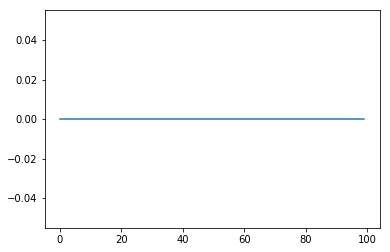

In [6]:
plt.plot(grid_data_1_1)

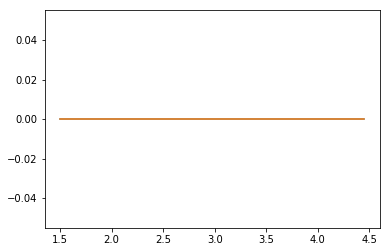

In [7]:
plt.plot(rs, np.gradient(grid_data_1_1, axis=0))
plt.plot(rs, np.zeros_like(rs))
plt.show()

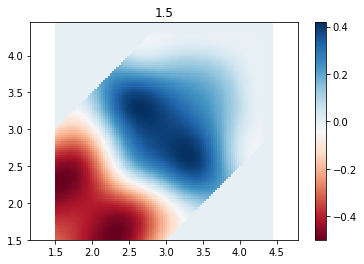

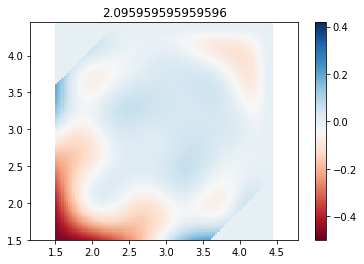

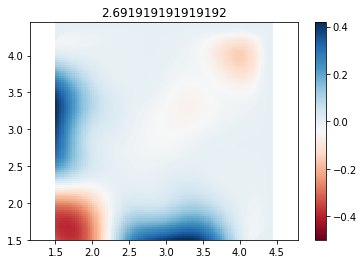

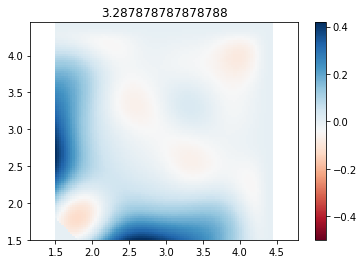

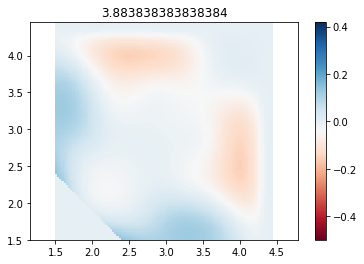

In [9]:
z_min, z_max = np.min(-grid_data_1_1_1), np.max(-grid_data_1_1_1)
for i in range(0, len(rs), 20):
    plt.title(rs[i])
    plt.pcolor(rs, rs, -grid_data_1_1_1[:,:,i], cmap='RdBu', vmin=z_min, vmax=z_max)
    plt.colorbar()
    plt.axis('equal')

    plt.show()
